## **Binary Classification with Support Vector Machine (SVC)**

**Definisi**: SVM adalah algoritma klasifikasi yang mencoba untuk menemukan hyperplane optimal yang memisahkan data ke dalam dua kelas. Untuk data yang tidak dapat dipisahkan secara linear, SVM menggunakan kernel untuk memetakan data ke ruang dimensi yang lebih tinggi.

**Pendekatan**: SVM berusaha untuk menemukan hyperplane yang memiliki margin terbesar antara dua kelas, dengan meminimalkan kesalahan klasifikasi

**Formula**:

$f(x) = w \times x \times b$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset for Binary classification
from sklearn.datasets import load_breast_cancer

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.svm import SVC

# metrics for evalution classification task
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [17]:
data = load_breast_cancer()

print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [18]:
# Load Dataset
X, y = load_breast_cancer(return_X_y=True)

X.shape, y.shape

((569, 30), (569,))

In [19]:
# split data into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [20]:
# Standarisation data
SC = StandardScaler()

X_train_scaled = SC.fit_transform(X_train, y_train)
X_test_scaled = SC.transform(X_test)

In [21]:
# train model
Svc = SVC(probability=True)

Svc.fit(X_train_scaled, y_train)

print(Svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy Score : 0.9824561403508771
F1 Score : 0.9861111111111112
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



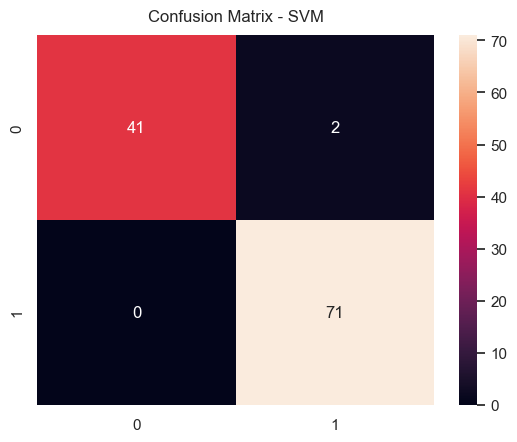

In [30]:
# evalution Model

y_pred = Svc.predict(X_test_scaled)
y_proba = Svc.predict_proba(X_test_scaled)[:,1]

# metrics classification
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)


# print metrics
print(f"Accuracy Score : {acc}")
print(f"F1 Score : {f1}")
print(clf_report)


# plot confusion matrix & ROC Curve
sns.set()

# confusion matrix
sns.heatmap(data=conf_matrix, annot=True)
plt.title(f"Confusion Matrix - SVM", fontsize=12, pad=10)
plt.show()


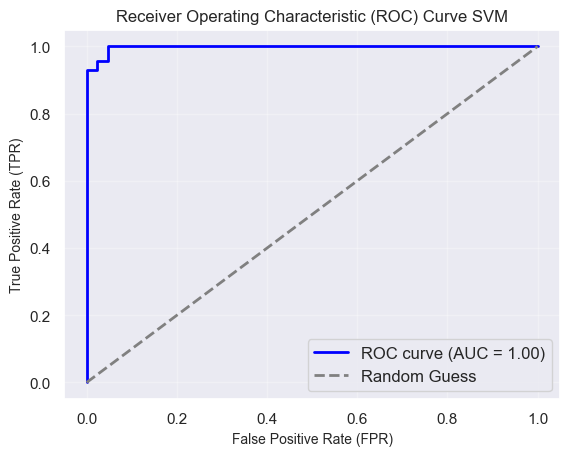

In [ ]:
# ROC plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random Guess")

plt.xlabel("False Positive Rate (FPR)", fontsize=10)
plt.ylabel("True Positive Rate (TPR)", fontsize=10)
plt.title("Receiver Operating Characteristic (ROC) Curve - SVM", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

